**1. Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error

Load the Dataset

In [ ]:
df = pd.read_csv("Netflix_Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


Encoding Categorical Values

In [ ]:
df['Plan Duration']=df['Plan Duration'].str.extract('(\d+)')
df = pd.get_dummies(df, columns=['Gender','Subscription Type'], drop_first=True)

Feature Selection

In [ ]:
x_rev = df[['Age','Plan Duration','Subscription Type_Standard']]
x_feed = df[['Age','Plan Duration','Subscription Type_Standard', 'Gender_Male']]

**2. Explaratory Data Analysis**

Descriptive Statistics

In [ ]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


Visualizations

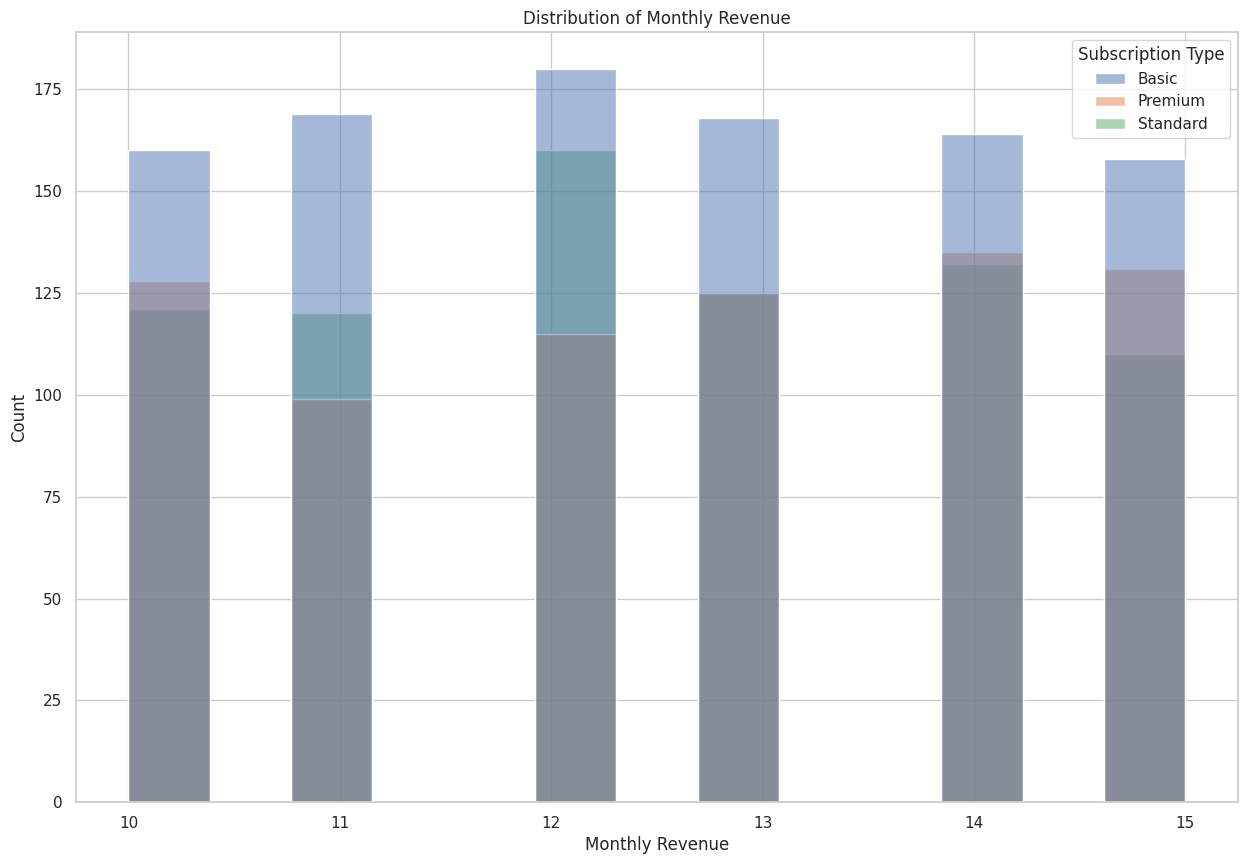

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Distribution of Monthly Revenue")
sns.histplot(x="Monthly Revenue", hue="Subscription Type", data=df)
plt.show()

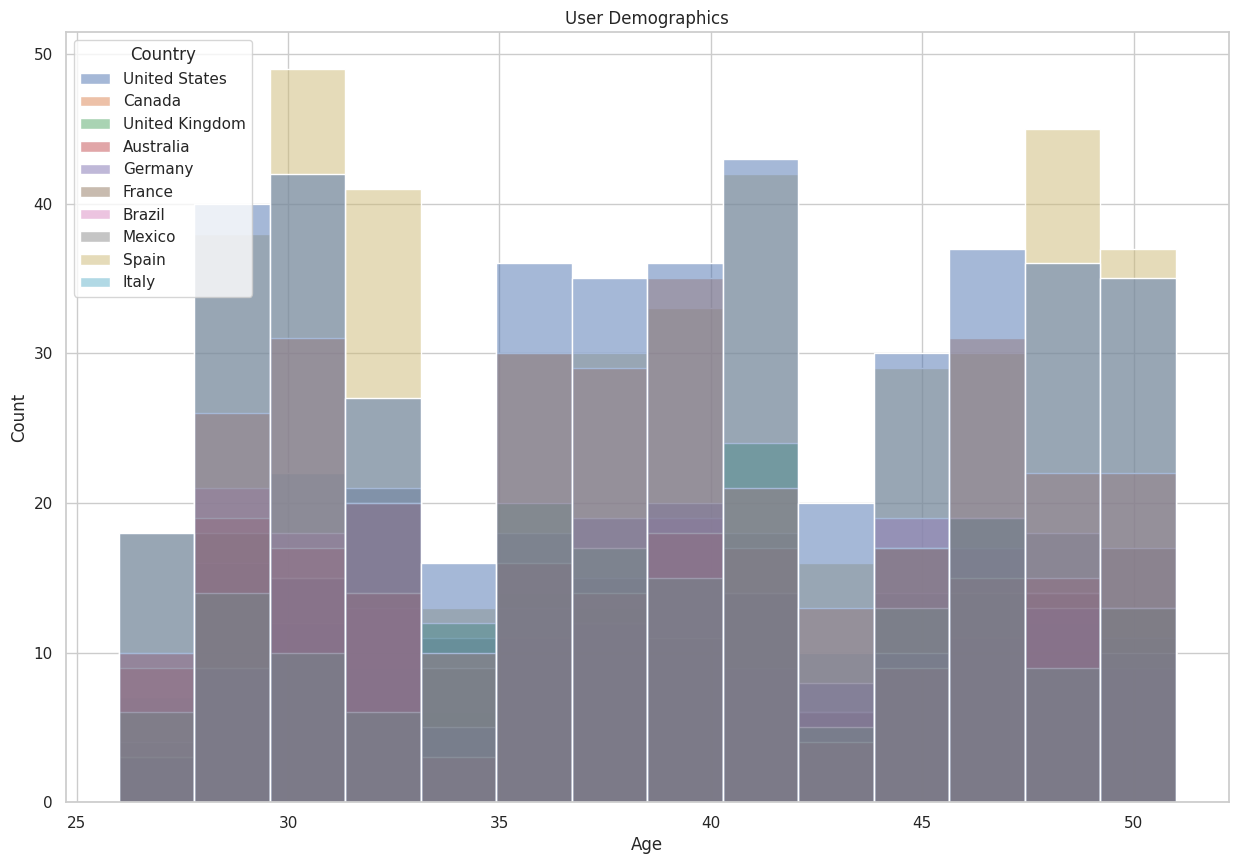

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("User Demographics")
sns.histplot(x="Age", hue="Country", data=df)
plt.show()

**3. Linear Regression Model (Predicting Monthly Revenue)**

Build the Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_rev, df['Monthly Revenue'], test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [ ]:
y_pred = linear_model.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

R-squared: -0.007993277926992004
RMSE: 1.668602613142419


**4. Logistic Regression Model (Predicting Customer Feedback)**

Model Building

In [ ]:
df['Feedback'] = np.where(df['Monthly Revenue'] > df['Monthly Revenue'].median(), 1,0)

X_train, X_test, Y_train, Y_test = train_test_split(x_feed, df['Feedback'], test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

Y_pred = logistic_model.predict(X_test)

Model Evaluation

In [ ]:
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
conf_mat = confusion_matrix(Y_test,Y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_mat)

Accuracy: 0.5
Precision: 0.4887459807073955
Recall: 0.6255144032921811
F1 Score: 0.5487364620938628
Confusion Matrix:
 [[ 98 159]
 [ 91 152]]


**5. Comparative Analysis and Visualization**

Feature Importance and Insights

In [ ]:
feat_imp = pd.DataFrame({'Feature': x_rev.columns, 'Coefficient': linear_model.coef_})
print("Feature Importance for Linear Regression Model:\n", feat_imp)

Feature Importance for Linear Regression Model:
                       Feature  Coefficient
0                         Age    -0.008295
1               Plan Duration     0.000000
2  Subscription Type_Standard    -0.087212


The most important feature for to determine for Monthly Revenue is the Subscription Type of the user as each Subscription Type differ in price and as for Feedback it is the User Demographic as every person has their own personal preferences and opinions.